키워드 & 주제 테그 살펴보기   
==

### 0. 컬럼 설명
    (1) keyword : 추천을 위해 교보문고에서 각 책에 단 테그
    (2) subject : 책의 주제와 관련된 테그
    
### 1. keyword 컬럼 정리   
    (1) str -> list 로 변환 
    (2) 하나의 테그인데 띄어쓰기 되어 있는 것들 공백 제거 ('현대인'을 '현대', '인'으로 분석하는 걸 방지하기 위해 )  
    (3) 다시 str -> list
    (4) new_keyword 컬럼에 띄어쓰기로 구분된 문장 추가

### 2. subject 컬럼 정리    
    (1) str -> list로 변환
    (2) # 제거
    (3) 다시 str -> list 변환
    (4) new_subject 컬럼에 띄어쓰기로 구분된 문장 추가
    
### 3. keyword 값 살펴보기
    (1) 전체 개수 7663
    (2) 중복 제거 개수 4221
    (3) 빈도수 내림차순으로 그래프 그리기
    
### 4. subject 값 살펴보기
    (1) 전체 개수 2137
    (2) 중복 제거 개수 1351
    (3) 빈도수 내림차순으로 그래프 그리기
    

In [61]:
book_df = pd.read_csv('../data/keyword.csv')
book_df.tail()

,ISBN,keyword,subject
1502,9788931579833,"['물리학', '골반', '한국인', '카툰', '근육', '어깨']",[]
1503,9791157684137,"['부산', '대한민국', '단어장', '공부', '자음', '성조']",[]
1504,9791125460220,"['영어회화', '직장 생활', '연애', '유튜브 채널', '에티켓', '생활영어']","['#영어회화', '#현지영어', '#생활영어']"
1505,9791156175940,"['언어 지식', '유형 공략', '실전 완벽 대비', '일본어 능력 시험', '청...",[]
1506,9788973646814,"['전치사', '조동사', '스펙', '동태', '구문', '의문문']",[]


In [62]:
len(book_df)

1507

### 1. keyword 컬럼 정리

In [63]:
book_df['keyword'][:1].values

array(["['시인', '수필', '오월', '박준', '박완서', '수필집']"], dtype=object)

In [64]:
# 문자열 데이터를 변환
from ast import literal_eval

In [65]:
book_df['keyword']= book_df['keyword'].apply(literal_eval)

In [66]:
book_df['keyword'][:1].values

array([list(['시인', '수필', '오월', '박준', '박완서', '수필집'])], dtype=object)

In [67]:
# 띄어 쓴 단어 붙이기 - 테스트
#book_df.loc[1, 'keyword'] = "['스토리텔링', '광개토대왕', '기출문제', '파이널', '압축', '막판']"

In [68]:
#book_df['keyword'][1:2]

In [69]:
# 띄어 쓴 단어 붙이기 - 적용
for idx, x in enumerate(book_df['keyword']):
    print(idx)
    print(x)
    temp = []
    for y in x:
        print(y, type(y))
        y = y.replace(' ', '')
        temp.append(y)
    print(temp)        
    book_df.loc[idx, 'keyword'] = str(temp)
    temp.clear()

0
['시인', '수필', '오월', '박준', '박완서', '수필집']
시인 <class 'str'>
수필 <class 'str'>
오월 <class 'str'>
박준 <class 'str'>
박완서 <class 'str'>
수필집 <class 'str'>
['시인', '수필', '오월', '박준', '박완서', '수필집']
1
['스토리텔링', '광개토 대왕', '기출 문제', '파이널', '압축', '막판']
스토리텔링 <class 'str'>
광개토 대왕 <class 'str'>
기출 문제 <class 'str'>
파이널 <class 'str'>
압축 <class 'str'>
막판 <class 'str'>
['스토리텔링', '광개토대왕', '기출문제', '파이널', '압축', '막판']
2
['페미니즘', '여성학', '시선', '페미니스트', '문화 정치', '역사학자']
페미니즘 <class 'str'>
여성학 <class 'str'>
시선 <class 'str'>
페미니스트 <class 'str'>
문화 정치 <class 'str'>
역사학자 <class 'str'>
['페미니즘', '여성학', '시선', '페미니스트', '문화정치', '역사학자']
3
['인간본성', '어머니', '작가', '한국 소설', '본성', '유진']
인간본성 <class 'str'>
어머니 <class 'str'>
작가 <class 'str'>
한국 소설 <class 'str'>
본성 <class 'str'>
유진 <class 'str'>
['인간본성', '어머니', '작가', '한국소설', '본성', '유진']
4
['가족', '여성', '청소년소설', '한국소설', '장편소설', '여성서사']
가족 <class 'str'>
여성 <class 'str'>
청소년소설 <class 'str'>
한국소설 <class 'str'>
장편소설 <class 'str'>
여성서사 <class 'str'>
['가족', '여성', '청소년소설', '한국소설', '장편소설', '여성서사

패러데이 <class 'str'>
과학이야기 <class 'str'>
슈뢰딩거 <class 'str'>
파울리 <class 'str'>
도플러 <class 'str'>
렌츠 <class 'str'>
['패러데이', '과학이야기', '슈뢰딩거', '파울리', '도플러', '렌츠']
113
['헌터', '하버드대학', '노벨', '파브르', '프라모델', '파스퇴르']
헌터 <class 'str'>
하버드대학 <class 'str'>
노벨 <class 'str'>
파브르 <class 'str'>
프라모델 <class 'str'>
파스퇴르 <class 'str'>
['헌터', '하버드대학', '노벨', '파브르', '프라모델', '파스퇴르']
114
['교양수학', '사고력', '논리', '패턴', '로또', '나비효과']
교양수학 <class 'str'>
사고력 <class 'str'>
논리 <class 'str'>
패턴 <class 'str'>
로또 <class 'str'>
나비효과 <class 'str'>
['교양수학', '사고력', '논리', '패턴', '로또', '나비효과']
115
['유기 화학', '전기 화학', '양자론', '염기 평형', '고분자', '반응']
유기 화학 <class 'str'>
전기 화학 <class 'str'>
양자론 <class 'str'>
염기 평형 <class 'str'>
고분자 <class 'str'>
반응 <class 'str'>
['유기화학', '전기화학', '양자론', '염기평형', '고분자', '반응']
116
['뇌과학', '아인슈타인', '로봇', '인공지능', '신경 과학', '브레인']
뇌과학 <class 'str'>
아인슈타인 <class 'str'>
로봇 <class 'str'>
인공지능 <class 'str'>
신경 과학 <class 'str'>
브레인 <class 'str'>
['뇌과학', '아인슈타인', '로봇', '인공지능', '신경과학', '브레인']
117
['과학이야기', '구약성경', '킹덤

195
['역사', '세계고전문학', '소설가', '연인', '여자', '우연']
역사 <class 'str'>
세계고전문학 <class 'str'>
소설가 <class 'str'>
연인 <class 'str'>
여자 <class 'str'>
우연 <class 'str'>
['역사', '세계고전문학', '소설가', '연인', '여자', '우연']
196
['황제', '로맨스소설', '웹소설', '로맨스', '나비', '판타지']
황제 <class 'str'>
로맨스소설 <class 'str'>
웹소설 <class 'str'>
로맨스 <class 'str'>
나비 <class 'str'>
판타지 <class 'str'>
['황제', '로맨스소설', '웹소설', '로맨스', '나비', '판타지']
197
['정령', '고등 학생', '자각', '은빛', '명계', '종족']
정령 <class 'str'>
고등 학생 <class 'str'>
자각 <class 'str'>
은빛 <class 'str'>
명계 <class 'str'>
종족 <class 'str'>
['정령', '고등학생', '자각', '은빛', '명계', '종족']
198
['문학', '죽음', '청춘', '기억', '사랑', '비틀스']
문학 <class 'str'>
죽음 <class 'str'>
청춘 <class 'str'>
기억 <class 'str'>
사랑 <class 'str'>
비틀스 <class 'str'>
['문학', '죽음', '청춘', '기억', '사랑', '비틀스']
199
['한국현대소설', '한국 소설', '여성서사', '여성', '살인사건', '조각']
한국현대소설 <class 'str'>
한국 소설 <class 'str'>
여성서사 <class 'str'>
여성 <class 'str'>
살인사건 <class 'str'>
조각 <class 'str'>
['한국현대소설', '한국소설', '여성서사', '여성', '살인사건', '조각']
200
['미스터리소설', '살인사건', '

306
['혐오', '미스터리', '의뢰인', '십자가', '미수', '가해자']
혐오 <class 'str'>
미스터리 <class 'str'>
의뢰인 <class 'str'>
십자가 <class 'str'>
미수 <class 'str'>
가해자 <class 'str'>
['혐오', '미스터리', '의뢰인', '십자가', '미수', '가해자']
307
['스릴러소설', '일본추리소설', '서스펜스', '트릭', '범인', '반전']
스릴러소설 <class 'str'>
일본추리소설 <class 'str'>
서스펜스 <class 'str'>
트릭 <class 'str'>
범인 <class 'str'>
반전 <class 'str'>
['스릴러소설', '일본추리소설', '서스펜스', '트릭', '범인', '반전']
308
[]
[]
309
['세계고전문학', '일본 사회', '직소', '자전적소설', '위선', '파멸']
세계고전문학 <class 'str'>
일본 사회 <class 'str'>
직소 <class 'str'>
자전적소설 <class 'str'>
위선 <class 'str'>
파멸 <class 'str'>
['세계고전문학', '일본사회', '직소', '자전적소설', '위선', '파멸']
310
[]
[]
311
[]
[]
312
['한국현대소설', '미스터리소설', '직업', '미스터리', '한국 소설', '퇴마 사']
한국현대소설 <class 'str'>
미스터리소설 <class 'str'>
직업 <class 'str'>
미스터리 <class 'str'>
한국 소설 <class 'str'>
퇴마 사 <class 'str'>
['한국현대소설', '미스터리소설', '직업', '미스터리', '한국소설', '퇴마사']
313
[]
[]
314
[]
[]
315
['미국소설', '드라마원작소설', '소설', '작품', '호텔', '백작']
미국소설 <class 'str'>
드라마원작소설 <class 'str'>
소설 <class 'str'>
작품 <class 

중급 <class 'str'>
동사 원형 <class 'str'>
일반 동사 <class 'str'>
강 문장 <class 'str'>
['시간', '습관', '중급', '동사원형', '일반동사', '강문장']
406
['재현', '신비', '사하라 사막', '프린스', '리틀', '불시착']
재현 <class 'str'>
신비 <class 'str'>
사하라 사막 <class 'str'>
프린스 <class 'str'>
리틀 <class 'str'>
불시착 <class 'str'>
['재현', '신비', '사하라사막', '프린스', '리틀', '불시착']
407
[]
[]
408
['유튜브', '기초영어', '퀴즈', '길고양이', '미국', '공부']
유튜브 <class 'str'>
기초영어 <class 'str'>
퀴즈 <class 'str'>
길고양이 <class 'str'>
미국 <class 'str'>
공부 <class 'str'>
['유튜브', '기초영어', '퀴즈', '길고양이', '미국', '공부']
409
['영어회화', '전치사', '기본 동사', '콩글리시', '원어민', '형용사']
영어회화 <class 'str'>
전치사 <class 'str'>
기본 동사 <class 'str'>
콩글리시 <class 'str'>
원어민 <class 'str'>
형용사 <class 'str'>
['영어회화', '전치사', '기본동사', '콩글리시', '원어민', '형용사']
410
['친구', '영어학습', '기초영어', '대한민국', '영어공부', '식당']
친구 <class 'str'>
영어학습 <class 'str'>
기초영어 <class 'str'>
대한민국 <class 'str'>
영어공부 <class 'str'>
식당 <class 'str'>
['친구', '영어학습', '기초영어', '대한민국', '영어공부', '식당']
411
['영어회화', '영어학습', '해외여행', '복습', '아임', '영어공부법']
영어회화 <class 'str'

513
['포토샵', '튜플', '응용 예제', '딕셔너리', '위젯', '스레드']
포토샵 <class 'str'>
튜플 <class 'str'>
응용 예제 <class 'str'>
딕셔너리 <class 'str'>
위젯 <class 'str'>
스레드 <class 'str'>
['포토샵', '튜플', '응용예제', '딕셔너리', '위젯', '스레드']
514
['고전 시가', '현대 소설', '고전 소설', '실제 수능', '연계 교재', '예언']
고전 시가 <class 'str'>
현대 소설 <class 'str'>
고전 소설 <class 'str'>
실제 수능 <class 'str'>
연계 교재 <class 'str'>
예언 <class 'str'>
['고전시가', '현대소설', '고전소설', '실제수능', '연계교재', '예언']
515
['내신', '수능', '파동', '대단원', '이중성', '비법 노트']
내신 <class 'str'>
수능 <class 'str'>
파동 <class 'str'>
대단원 <class 'str'>
이중성 <class 'str'>
비법 노트 <class 'str'>
['내신', '수능', '파동', '대단원', '이중성', '비법노트']
516
['국제 관계', '기출 문제', '헌법', '단원 마무리 문제', '한반도', '인권 보장']
국제 관계 <class 'str'>
기출 문제 <class 'str'>
헌법 <class 'str'>
단원 마무리 문제 <class 'str'>
한반도 <class 'str'>
인권 보장 <class 'str'>
['국제관계', '기출문제', '헌법', '단원마무리문제', '한반도', '인권보장']
517
['학년도 수능', '학평', '모평', '학력 평가', '물질대사', '방어 작용']
학년도 수능 <class 'str'>
학평 <class 'str'>
모평 <class 'str'>
학력 평가 <class 'str'>
물질대사 <class 'str'>
방어 작용 <class 

시험 <class 'str'>
준비 <class 'str'>
['내신대비', '교육', '학습', '기초문법', '시험', '준비']
602
['내신 대비', '복지 제도', '양상', '계층', '현대 사회', '평등 현상']
내신 대비 <class 'str'>
복지 제도 <class 'str'>
양상 <class 'str'>
계층 <class 'str'>
현대 사회 <class 'str'>
평등 현상 <class 'str'>
['내신대비', '복지제도', '양상', '계층', '현대사회', '평등현상']
603
[]
[]
604
['방정식', '인수 분해', '다항식', '부등식', '나머지 정리', '복소수']
방정식 <class 'str'>
인수 분해 <class 'str'>
다항식 <class 'str'>
부등식 <class 'str'>
나머지 정리 <class 'str'>
복소수 <class 'str'>
['방정식', '인수분해', '다항식', '부등식', '나머지정리', '복소수']
605
['문장', '특강', '마스터', '어휘 추론', '학력 평가', '일치']
문장 <class 'str'>
특강 <class 'str'>
마스터 <class 'str'>
어휘 추론 <class 'str'>
학력 평가 <class 'str'>
일치 <class 'str'>
['문장', '특강', '마스터', '어휘추론', '학력평가', '일치']
606
[]
[]
607
['교과서 개념', '정리', '중등 수학', '원주각', '각비', '중학교 수학 학습']
교과서 개념 <class 'str'>
정리 <class 'str'>
중등 수학 <class 'str'>
원주각 <class 'str'>
각비 <class 'str'>
중학교 수학 학습 <class 'str'>
['교과서개념', '정리', '중등수학', '원주각', '각비', '중학교수학학습']
608
['프로그래밍', '컴퓨터', '개발자', '부동소수점', '빌 게이츠', '마이크로프로세서']
프로그래

['말씀묵상', '큐티', '인생', '아브라함', '사라', '하나님아버지']
707
['복음', '윤리학', '언약', '유기성', '십자가', '마귀']
복음 <class 'str'>
윤리학 <class 'str'>
언약 <class 'str'>
유기성 <class 'str'>
십자가 <class 'str'>
마귀 <class 'str'>
['복음', '윤리학', '언약', '유기성', '십자가', '마귀']
708
['화엄경', '경전', '마음', '대승불교', '서품', '유품']
화엄경 <class 'str'>
경전 <class 'str'>
마음 <class 'str'>
대승불교 <class 'str'>
서품 <class 'str'>
유품 <class 'str'>
['화엄경', '경전', '마음', '대승불교', '서품', '유품']
709
['불교경전', '경전', '기도', '행복', '대승불교', '지장보살']
불교경전 <class 'str'>
경전 <class 'str'>
기도 <class 'str'>
행복 <class 'str'>
대승불교 <class 'str'>
지장보살 <class 'str'>
['불교경전', '경전', '기도', '행복', '대승불교', '지장보살']
710
['성경 통독', '갈라디아서', '교인', '신명기', '선교단체', '마태복음']
성경 통독 <class 'str'>
갈라디아서 <class 'str'>
교인 <class 'str'>
신명기 <class 'str'>
선교단체 <class 'str'>
마태복음 <class 'str'>
['성경통독', '갈라디아서', '교인', '신명기', '선교단체', '마태복음']
711
['중학교', '식물', '최근 경향 반영', '학습', '태양계', '전기']
중학교 <class 'str'>
식물 <class 'str'>
최근 경향 반영 <class 'str'>
학습 <class 'str'>
태양계 <class 'str'>
전기 <class 'str'>
['중학교', 

도깨비 <class 'str'>
으랏차차 <class 'str'>
가나다 <class 'str'>
날아라 <class 'str'>
['육아법', '놀이교육', '도깨비', '으랏차차', '가나다', '날아라']
814
['엄마', '자녀교육', '심플', '육아', '솔루션', '감정 조절']
엄마 <class 'str'>
자녀교육 <class 'str'>
심플 <class 'str'>
육아 <class 'str'>
솔루션 <class 'str'>
감정 조절 <class 'str'>
['엄마', '자녀교육', '심플', '육아', '솔루션', '감정조절']
815
['독서', '교사', '일기', '학교', '내공', '글쓰기지도']
독서 <class 'str'>
교사 <class 'str'>
일기 <class 'str'>
학교 <class 'str'>
내공 <class 'str'>
글쓰기지도 <class 'str'>
['독서', '교사', '일기', '학교', '내공', '글쓰기지도']
816
['육아법', '자녀양육', '식습관', '생활습관', '월스트리트', '루소']
육아법 <class 'str'>
자녀양육 <class 'str'>
식습관 <class 'str'>
생활습관 <class 'str'>
월스트리트 <class 'str'>
루소 <class 'str'>
['육아법', '자녀양육', '식습관', '생활습관', '월스트리트', '루소']
817
['자녀교육', '상상력', '창의력', '사고력', '육아', '부모']
자녀교육 <class 'str'>
상상력 <class 'str'>
창의력 <class 'str'>
사고력 <class 'str'>
육아 <class 'str'>
부모 <class 'str'>
['자녀교육', '상상력', '창의력', '사고력', '육아', '부모']
818
['공감', '자녀교육', '하라리', '마음', '소통', '놀이']
공감 <class 'str'>
자녀교육 <class 'str'>
하라리 <class 'st

한국에세이 <class 'str'>
희망 <class 'str'>
['카피라이터', '사랑', '위로', '일상', '한국에세이', '희망']
920
[]
[]
921
['한국현대시', '필사', '니체', '천양희', '이성복', '김혜순']
한국현대시 <class 'str'>
필사 <class 'str'>
니체 <class 'str'>
천양희 <class 'str'>
이성복 <class 'str'>
김혜순 <class 'str'>
['한국현대시', '필사', '니체', '천양희', '이성복', '김혜순']
922
['가드너', '위로', '힐링', '치유', '반려식물', '반려 동물']
가드너 <class 'str'>
위로 <class 'str'>
힐링 <class 'str'>
치유 <class 'str'>
반려식물 <class 'str'>
반려 동물 <class 'str'>
['가드너', '위로', '힐링', '치유', '반려식물', '반려동물']
923
['인생', '인생 상담', '정직', '한국현대수필', '미움', '둔감']
인생 <class 'str'>
인생 상담 <class 'str'>
정직 <class 'str'>
한국현대수필 <class 'str'>
미움 <class 'str'>
둔감 <class 'str'>
['인생', '인생상담', '정직', '한국현대수필', '미움', '둔감']
924
['한국에세이', '수필', '책방', '메일', '월화', '당신']
한국에세이 <class 'str'>
수필 <class 'str'>
책방 <class 'str'>
메일 <class 'str'>
월화 <class 'str'>
당신 <class 'str'>
['한국에세이', '수필', '책방', '메일', '월화', '당신']
925
['나치', '정신 의학', '강제 수용소', '로고', '실존', '테라']
나치 <class 'str'>
정신 의학 <class 'str'>
강제 수용소 <class 'str'>
로고 <class 'str'>
실존 

1011
[]
[]
1012
['근력 운동', '유산소 운동', '복부비만', '웨이트', '근육', '운동 능력']
근력 운동 <class 'str'>
유산소 운동 <class 'str'>
복부비만 <class 'str'>
웨이트 <class 'str'>
근육 <class 'str'>
운동 능력 <class 'str'>
['근력운동', '유산소운동', '복부비만', '웨이트', '근육', '운동능력']
1013
['스트레칭', '골반', '홈트레이닝', '메이크', '트레이너', '건강관리']
스트레칭 <class 'str'>
골반 <class 'str'>
홈트레이닝 <class 'str'>
메이크 <class 'str'>
트레이너 <class 'str'>
건강관리 <class 'str'>
['스트레칭', '골반', '홈트레이닝', '메이크', '트레이너', '건강관리']
1014
['물리치료사', '운동 프로그램', '동작', '기본원리', '척추', '매트']
물리치료사 <class 'str'>
운동 프로그램 <class 'str'>
동작 <class 'str'>
기본원리 <class 'str'>
척추 <class 'str'>
매트 <class 'str'>
['물리치료사', '운동프로그램', '동작', '기본원리', '척추', '매트']
1015
['질병', '해부학', '기계', '호흡기계', '태아', '신체구조']
질병 <class 'str'>
해부학 <class 'str'>
기계 <class 'str'>
호흡기계 <class 'str'>
태아 <class 'str'>
신체구조 <class 'str'>
['질병', '해부학', '기계', '호흡기계', '태아', '신체구조']
1016
['집중력', '일본', '영재', '파트', '히트 상품', '수리']
집중력 <class 'str'>
일본 <class 'str'>
영재 <class 'str'>
파트 <class 'str'>
히트 상품 <class 'str'>
수리 <class 'str'>
['집

의례 <class 'str'>
현대 <class 'str'>
게르만 <class 'str'>
['놀이', '인류학', '사피엔스', '의례', '현대', '게르만']
1113
[]
[]
1114
['저축', '부자되는법', '펀드', '투자', '투자 방법', '주식']
저축 <class 'str'>
부자되는법 <class 'str'>
펀드 <class 'str'>
투자 <class 'str'>
투자 방법 <class 'str'>
주식 <class 'str'>
['저축', '부자되는법', '펀드', '투자', '투자방법', '주식']
1115
['지방세법', '국세 기본법', '법인세법', '조세법', '소득세법', '조세범']
지방세법 <class 'str'>
국세 기본법 <class 'str'>
법인세법 <class 'str'>
조세법 <class 'str'>
소득세법 <class 'str'>
조세범 <class 'str'>
['지방세법', '국세기본법', '법인세법', '조세법', '소득세법', '조세범']
1116
[]
[]
1117
['스타트업', '기업 가치', '모바일', '코로나', '엑셀', '트래블']
스타트업 <class 'str'>
기업 가치 <class 'str'>
모바일 <class 'str'>
코로나 <class 'str'>
엑셀 <class 'str'>
트래블 <class 'str'>
['스타트업', '기업가치', '모바일', '코로나', '엑셀', '트래블']
1118
['우울증', '항우울제', '중독', '감정', '우울', '인지치료']
우울증 <class 'str'>
항우울제 <class 'str'>
중독 <class 'str'>
감정 <class 'str'>
우울 <class 'str'>
인지치료 <class 'str'>
['우울증', '항우울제', '중독', '감정', '우울', '인지치료']
1119
['판타지', '내면', '프레', '조율', '에너지', '러시아']
판타지 <class 'str'>
내면 <clas

1216
['대출', '부동산시장', '투자', '월세', '부동산정책', '소득세']
대출 <class 'str'>
부동산시장 <class 'str'>
투자 <class 'str'>
월세 <class 'str'>
부동산정책 <class 'str'>
소득세 <class 'str'>
['대출', '부동산시장', '투자', '월세', '부동산정책', '소득세']
1217
['화술', '마케팅', '설득', '심리', '원칙', '방어']
화술 <class 'str'>
마케팅 <class 'str'>
설득 <class 'str'>
심리 <class 'str'>
원칙 <class 'str'>
방어 <class 'str'>
['화술', '마케팅', '설득', '심리', '원칙', '방어']
1218
['비즈니스 모델', '미국', '익스프레스', '상상력', '기업가', '포브스']
비즈니스 모델 <class 'str'>
미국 <class 'str'>
익스프레스 <class 'str'>
상상력 <class 'str'>
기업가 <class 'str'>
포브스 <class 'str'>
['비즈니스모델', '미국', '익스프레스', '상상력', '기업가', '포브스']
1219
['소비자', '경제전망', '페르소나', '복수', '세대', '소비']
소비자 <class 'str'>
경제전망 <class 'str'>
페르소나 <class 'str'>
복수 <class 'str'>
세대 <class 'str'>
소비 <class 'str'>
['소비자', '경제전망', '페르소나', '복수', '세대', '소비']
1220
['저축', '월급쟁이', '펀드', '자산 관리', '노후 준비', '절세']
저축 <class 'str'>
월급쟁이 <class 'str'>
펀드 <class 'str'>
자산 관리 <class 'str'>
노후 준비 <class 'str'>
절세 <class 'str'>
['저축', '월급쟁이', '펀드', '자산관리', '노후준비', '절세']
12

1318
['그래픽 노블', '일본', '백범 김구', '일제시대', '김현주', '독립운동']
그래픽 노블 <class 'str'>
일본 <class 'str'>
백범 김구 <class 'str'>
일제시대 <class 'str'>
김현주 <class 'str'>
독립운동 <class 'str'>
['그래픽노블', '일본', '백범김구', '일제시대', '김현주', '독립운동']
1319
['웹툰', '돋보기', '르네상스', '루터', '종교개혁', '칼뱅']
웹툰 <class 'str'>
돋보기 <class 'str'>
르네상스 <class 'str'>
루터 <class 'str'>
종교개혁 <class 'str'>
칼뱅 <class 'str'>
['웹툰', '돋보기', '르네상스', '루터', '종교개혁', '칼뱅']
1320
['웹툰', '돋보기', '유라시아', '동서양', '몽골 제국', '이슬람']
웹툰 <class 'str'>
돋보기 <class 'str'>
유라시아 <class 'str'>
동서양 <class 'str'>
몽골 제국 <class 'str'>
이슬람 <class 'str'>
['웹툰', '돋보기', '유라시아', '동서양', '몽골제국', '이슬람']
1321
[]
[]
1322
['퓰리처상', '에피쿠로스', '유럽사', '후스', '몽테뉴', '보티첼리']
퓰리처상 <class 'str'>
에피쿠로스 <class 'str'>
유럽사 <class 'str'>
후스 <class 'str'>
몽테뉴 <class 'str'>
보티첼리 <class 'str'>
['퓰리처상', '에피쿠로스', '유럽사', '후스', '몽테뉴', '보티첼리']
1323
['로마', '서유럽', '그리스', '폴리스', '이탈리아', '이슬람']
로마 <class 'str'>
서유럽 <class 'str'>
그리스 <class 'str'>
폴리스 <class 'str'>
이탈리아 <class 'str'>
이슬람 <class 'str'>
['로마', '서유

민주주의 <class 'str'>
상상력 <class 'str'>
광주 <class 'str'>
['윤태호', '역사만화', '제주', '민주주의', '상상력', '광주']
1414
['세계사', '사마천', '헤로도토스', '역사철학', '신채호', '박은식']
세계사 <class 'str'>
사마천 <class 'str'>
헤로도토스 <class 'str'>
역사철학 <class 'str'>
신채호 <class 'str'>
박은식 <class 'str'>
['세계사', '사마천', '헤로도토스', '역사철학', '신채호', '박은식']
1415
['유비', '역사만화', '중국', '드라마', '관우', '중국사']
유비 <class 'str'>
역사만화 <class 'str'>
중국 <class 'str'>
드라마 <class 'str'>
관우 <class 'str'>
중국사 <class 'str'>
['유비', '역사만화', '중국', '드라마', '관우', '중국사']
1416
['역사', '살인사건', '잔 다르크', '클레오파트라', '날조', '드라큘라']
역사 <class 'str'>
살인사건 <class 'str'>
잔 다르크 <class 'str'>
클레오파트라 <class 'str'>
날조 <class 'str'>
드라큘라 <class 'str'>
['역사', '살인사건', '잔다르크', '클레오파트라', '날조', '드라큘라']
1417
['조선시대', '사도 세자', '영조', '갈등', '정조', '한국고전문학']
조선시대 <class 'str'>
사도 세자 <class 'str'>
영조 <class 'str'>
갈등 <class 'str'>
정조 <class 'str'>
한국고전문학 <class 'str'>
['조선시대', '사도세자', '영조', '갈등', '정조', '한국고전문학']
1418
['한국사', '조선시대', '조선 최고', '조선 최초', '임금', '호랑이']
한국사 <class 'str'>
조선시대 <class 

In [70]:
book_df.head()

,ISBN,keyword,subject
0,9788937437496,"['시인', '수필', '오월', '박준', '박완서', '수필집']",[]
1,9791129706126,"['스토리텔링', '광개토대왕', '기출문제', '파이널', '압축', '막판']",[]
2,9788901240114,"['페미니즘', '여성학', '시선', '페미니스트', '문화정치', '역사학자']",[]
3,9788956609959,"['인간본성', '어머니', '작가', '한국소설', '본성', '유진']","['#살인자', '#인간본성', '#악인']"
4,9788936477936,"['가족', '여성', '청소년소설', '한국소설', '장편소설', '여성서사']","['#한국소설', '#청소년소설', '#여성서사', '#일제강점기', '#근현대사'..."


In [71]:
# 다시 문자열을 변환
book_df['keyword']= book_df['keyword'].apply(literal_eval)

In [72]:
# 띄어쓰기로 구분된 문장만들기
book_df['new_keyword'] = book_df['keyword'].apply(lambda x : (' ').join(x))
book_df.head()

,ISBN,keyword,subject,new_keyword
0,9788937437496,"[시인, 수필, 오월, 박준, 박완서, 수필집]",[],시인 수필 오월 박준 박완서 수필집
1,9791129706126,"[스토리텔링, 광개토대왕, 기출문제, 파이널, 압축, 막판]",[],스토리텔링 광개토대왕 기출문제 파이널 압축 막판
2,9788901240114,"[페미니즘, 여성학, 시선, 페미니스트, 문화정치, 역사학자]",[],페미니즘 여성학 시선 페미니스트 문화정치 역사학자
3,9788956609959,"[인간본성, 어머니, 작가, 한국소설, 본성, 유진]","['#살인자', '#인간본성', '#악인']",인간본성 어머니 작가 한국소설 본성 유진
4,9788936477936,"[가족, 여성, 청소년소설, 한국소설, 장편소설, 여성서사]","['#한국소설', '#청소년소설', '#여성서사', '#일제강점기', '#근현대사'...",가족 여성 청소년소설 한국소설 장편소설 여성서사


### 2. subject 컬럼 정리

In [73]:
book_df['subject'][:1].values

array(['[]'], dtype=object)

In [74]:
# 문자열을 변환
book_df['subject'] = book_df['subject'].apply(literal_eval)

In [75]:
book_df['subject'][:1].values

array([list([])], dtype=object)

In [76]:
# 태그 제거
book_df['subject'] = book_df['subject'].apply(lambda x: str(x).replace('#', ''))

In [77]:
book_df.head()

,ISBN,keyword,subject,new_keyword
0,9788937437496,"[시인, 수필, 오월, 박준, 박완서, 수필집]",[],시인 수필 오월 박준 박완서 수필집
1,9791129706126,"[스토리텔링, 광개토대왕, 기출문제, 파이널, 압축, 막판]",[],스토리텔링 광개토대왕 기출문제 파이널 압축 막판
2,9788901240114,"[페미니즘, 여성학, 시선, 페미니스트, 문화정치, 역사학자]",[],페미니즘 여성학 시선 페미니스트 문화정치 역사학자
3,9788956609959,"[인간본성, 어머니, 작가, 한국소설, 본성, 유진]","['살인자', '인간본성', '악인']",인간본성 어머니 작가 한국소설 본성 유진
4,9788936477936,"[가족, 여성, 청소년소설, 한국소설, 장편소설, 여성서사]","['한국소설', '청소년소설', '여성서사', '일제강점기', '근현대사', '가족...",가족 여성 청소년소설 한국소설 장편소설 여성서사


In [78]:
# 다시 문자열을 변환
book_df['subject'] = book_df['subject'].apply(literal_eval)

In [79]:
# 띄어쓰기로 구분된 문장만들기
book_df['new_subject'] = book_df['subject'].apply(lambda x: (' ').join(x))
book_df.head()

,ISBN,keyword,subject,new_keyword,new_subject
0,9788937437496,"[시인, 수필, 오월, 박준, 박완서, 수필집]",[],시인 수필 오월 박준 박완서 수필집,
1,9791129706126,"[스토리텔링, 광개토대왕, 기출문제, 파이널, 압축, 막판]",[],스토리텔링 광개토대왕 기출문제 파이널 압축 막판,
2,9788901240114,"[페미니즘, 여성학, 시선, 페미니스트, 문화정치, 역사학자]",[],페미니즘 여성학 시선 페미니스트 문화정치 역사학자,
3,9788956609959,"[인간본성, 어머니, 작가, 한국소설, 본성, 유진]","[살인자, 인간본성, 악인]",인간본성 어머니 작가 한국소설 본성 유진,살인자 인간본성 악인
4,9788936477936,"[가족, 여성, 청소년소설, 한국소설, 장편소설, 여성서사]","[한국소설, 청소년소설, 여성서사, 일제강점기, 근현대사, 가족, 여성, 엄마]",가족 여성 청소년소설 한국소설 장편소설 여성서사,한국소설 청소년소설 여성서사 일제강점기 근현대사 가족 여성 엄마


### 3. keyword 값 살펴보기

In [80]:
keyword_temp = sum(book_df['keyword'], [])

In [81]:
keyword_temp

['시인',
 '수필',
 '오월',
 '박준',
 '박완서',
 '수필집',
 '스토리텔링',
 '광개토대왕',
 '기출문제',
 '파이널',
 '압축',
 '막판',
 '페미니즘',
 '여성학',
 '시선',
 '페미니스트',
 '문화정치',
 '역사학자',
 '인간본성',
 '어머니',
 '작가',
 '한국소설',
 '본성',
 '유진',
 '가족',
 '여성',
 '청소년소설',
 '한국소설',
 '장편소설',
 '여성서사',
 '성장소설',
 '데미안',
 '사문',
 '바라문',
 '뱃사공',
 '타마',
 '미국소설',
 '노벨문학상',
 '퓰리처상',
 '실존철학',
 '마지막소설',
 '미국현대문학',
 '연애',
 '일상',
 '심리학',
 '한국에세이',
 '위로',
 '마음챙김',
 '차라투스트라',
 '철학에세이',
 '우파니샤드',
 '계단',
 '인문과학',
 '불편',
 '여행에세이',
 '바르셀로나',
 '빈티지',
 '포틀랜드',
 '뉴질랜드',
 '베를린',
 '추천코스',
 '여행코스',
 '자전거여행',
 '순환',
 '삼양',
 '동해',
 '여행가이드북',
 '유럽여행',
 '체코',
 '베스트',
 '프라하',
 '크로아티아',
 '여행가이드북',
 '타이베이',
 '타이',
 '대만여행',
 '동부',
 '숙소예약',
 '웹툰',
 '케냐',
 '에티오피아',
 '갱스터',
 '마다가스카르',
 '우간다',
 '책읽기',
 '만화책',
 '스리랑카',
 '영어교육',
 '언어교육',
 '교육방법',
 '시나리오',
 '감독',
 '야구',
 '히어로즈',
 '이글스',
 '이슈',
 '심리치료',
 '응급처치',
 '생존',
 '락스',
 '아쿠아',
 '서바이벌',
 '스티커북',
 '그레이',
 '하운드',
 '아이슬란드',
 '치와와',
 '진돗개',
 '행복',
 '자기관리',
 '자기혁신',
 '대인관계',
 '긍정',
 '우울',
 '유튜브',
 '시간관리',
 '전술',
 '스마트폰',
 '하이라이트',

In [82]:
# 전체 키워드 개수
len(keyword_temp)

7663

In [83]:
# 중복제거한 키워드 개수
keyword_temp2 = set(keyword_temp)
len(keyword_temp2)

4221

In [84]:
# 단어 빈도 세기
import nltk

keyword_temp3 = nltk.Text(keyword_temp, name='키워드')

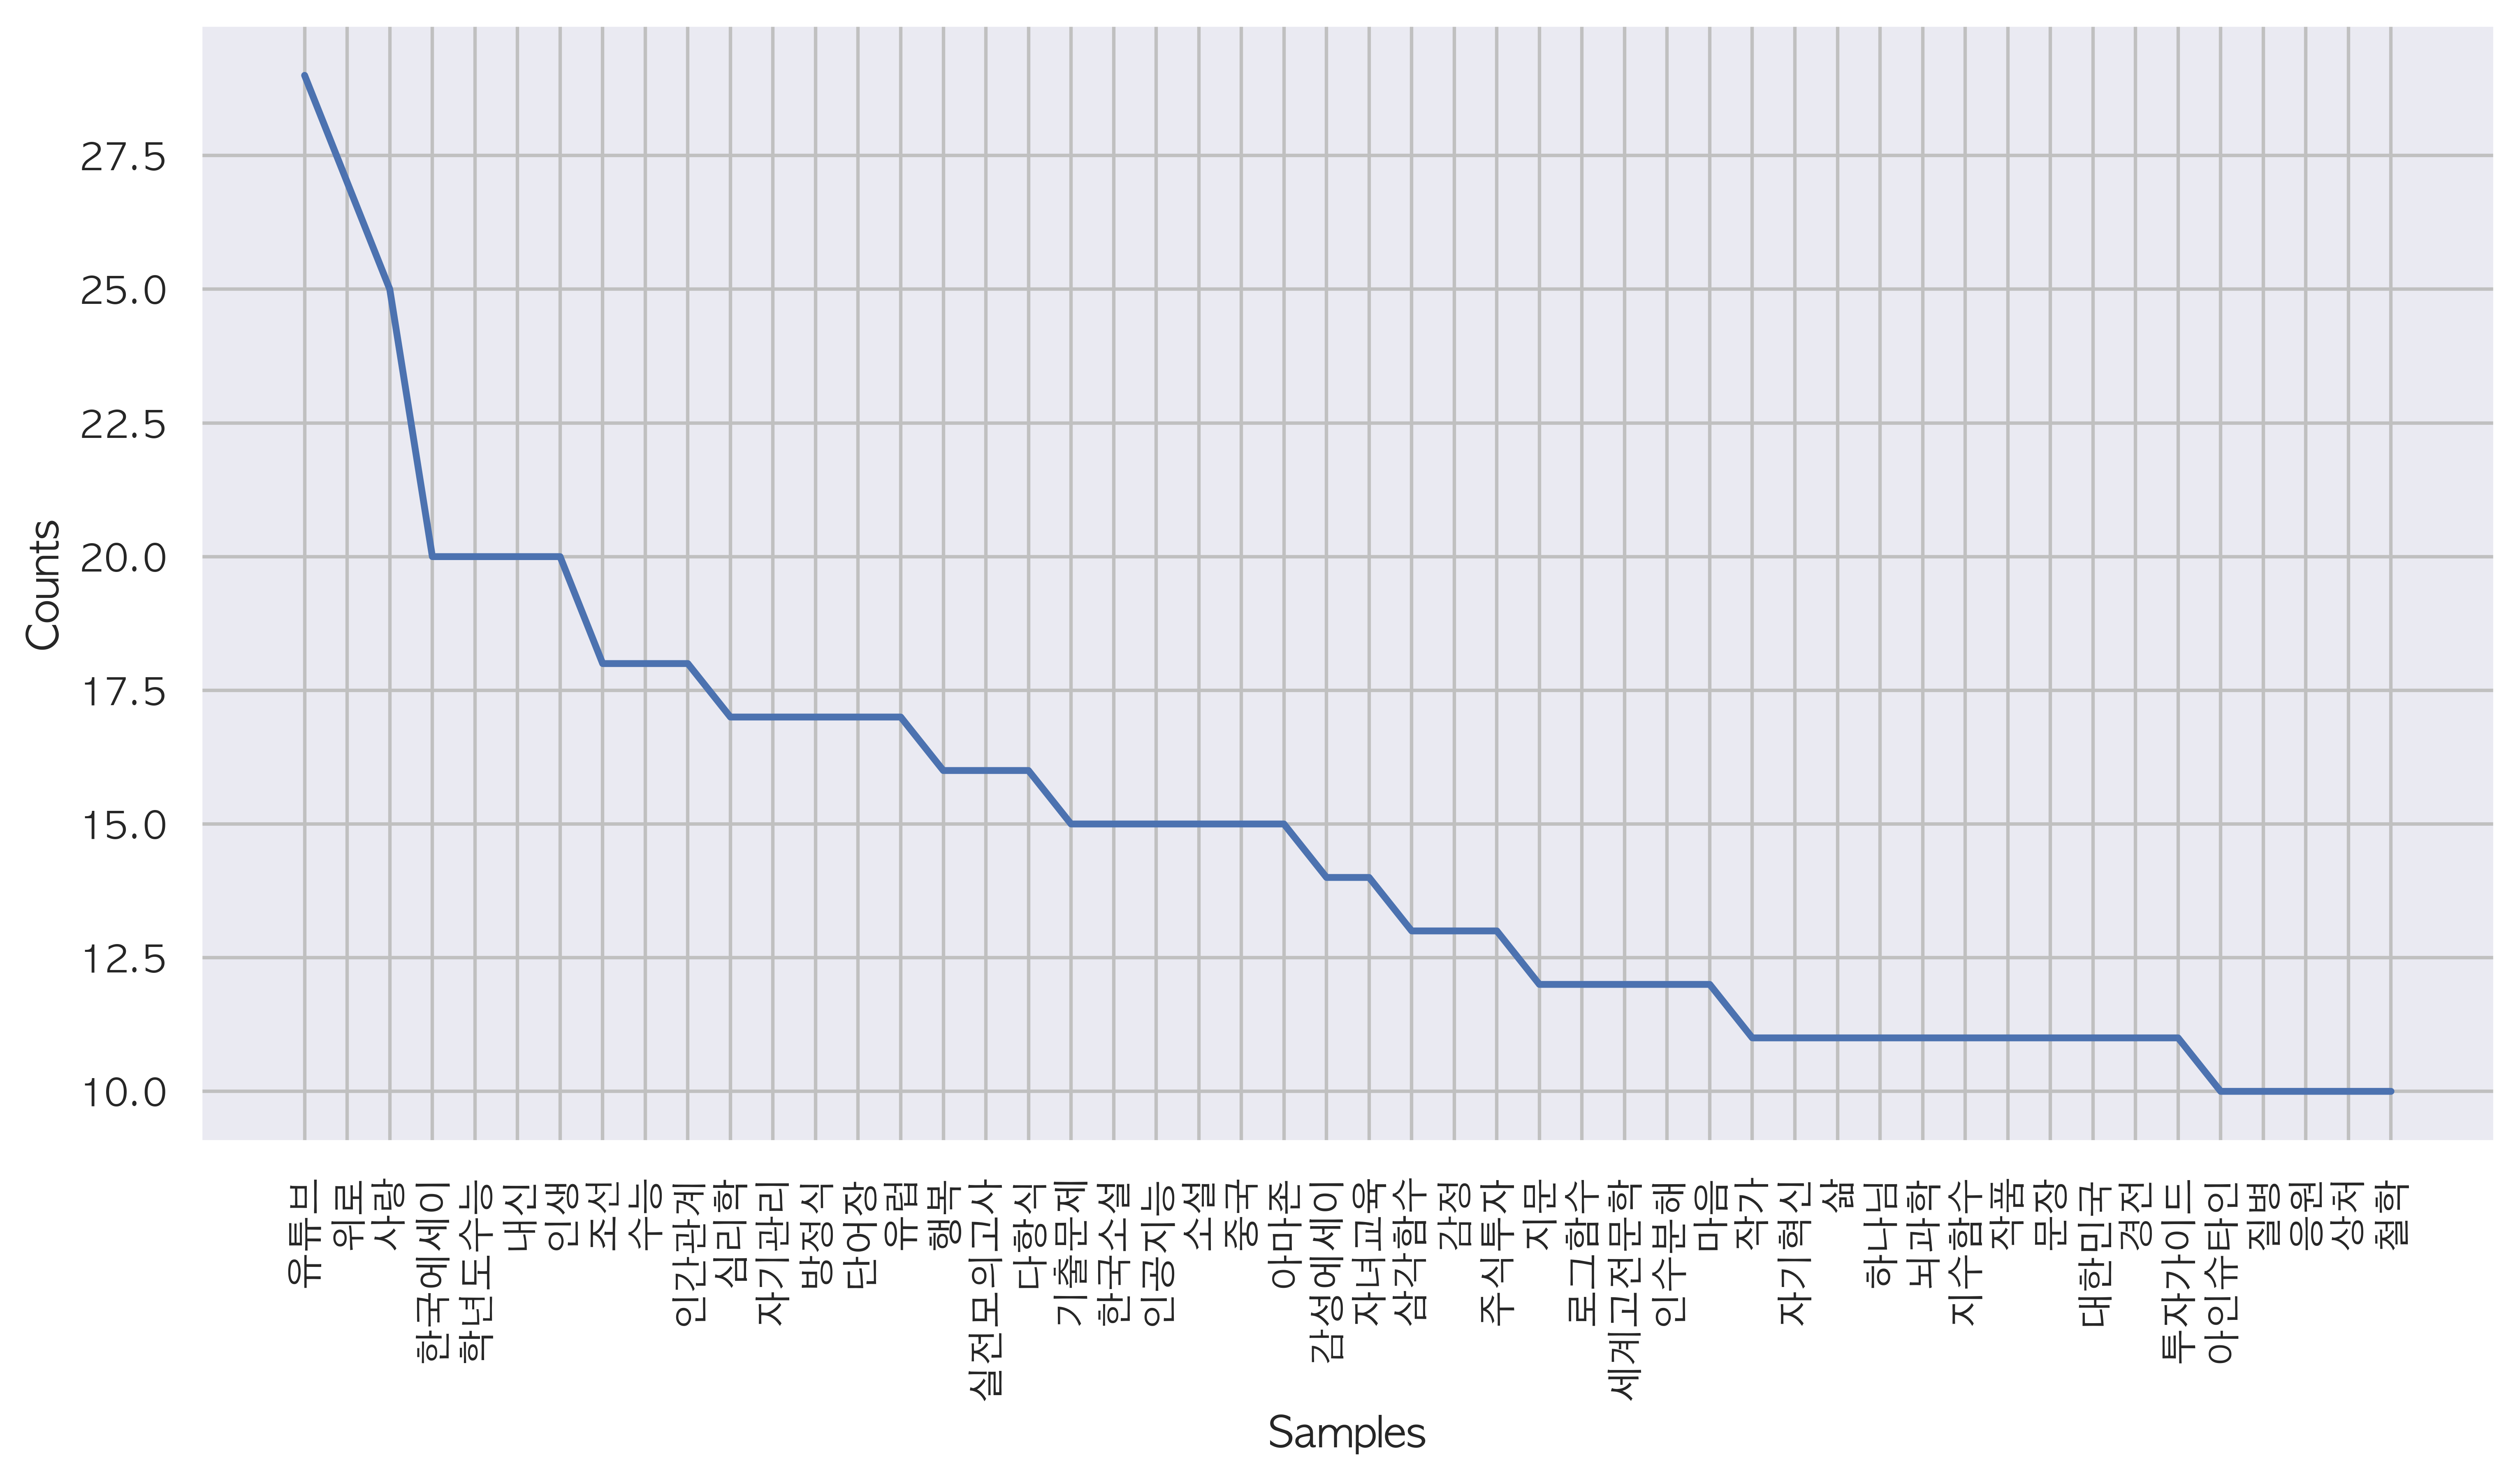

In [96]:
# 단어 빈도 그래프로 그리기

# 한글 폰트 설정
import  matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

#f_path = "c:/Windows/Fonts/Nanumgothic.ttf"
#font_name = font_manager.FontProperties(fname=f_path).get_name()
#rc('font', family=font_name)

plt.figure(figsize=(12, 6))
keyword_temp3.plot(50)
plt.show()

### 4. subject 값 살펴 보기

In [87]:
subject_temp = sum(book_df['subject'], [])

In [88]:
subject_temp

['살인자',
 '인간본성',
 '악인',
 '한국소설',
 '청소년소설',
 '여성서사',
 '일제강점기',
 '근현대사',
 '가족',
 '여성',
 '엄마',
 '성장소설',
 '퓰리처상',
 '미국현대문학',
 '미국소설',
 '노벨문학상',
 '한국에세이',
 '명상',
 '혼자',
 '소확행',
 '연애',
 '일상',
 '마음챙김',
 '심리학',
 '철학에세이',
 '인문과학',
 '시간관리',
 '애견기르기',
 '반려동물',
 '반려견',
 '기독교결혼',
 '정치가',
 '교양과학',
 '우주',
 '은하계',
 '태양',
 '천문학',
 '과학자',
 '교양과학',
 '과학이야기',
 '전염병',
 '감염',
 '과학이야기',
 '물리학',
 '빅뱅이론',
 '양자역학',
 '대유행',
 '전염병',
 '병원균',
 '판데믹',
 '칼세이건',
 '다큐멘터리',
 '우주',
 '생명',
 '자연',
 '기원',
 '법칙',
 '탐구',
 '교양수학',
 '수학개념',
 '과학이야기',
 '뇌기능장애',
 '신경장애',
 '뇌의학',
 '뇌과학',
 '현대의학',
 '임상기록',
 '과학이야기',
 '유전학',
 '현대생물학',
 '경제자격증',
 '무역영어',
 '모듈형',
 'NCS',
 '직업기초능력평가',
 '공기업',
 '공사공단',
 '위포트',
 'NCS',
 '모의고사',
 '과학이야기',
 '현대수학',
 '수학강의',
 '상대성이론',
 '페르마',
 '우주',
 '일반상대성이론',
 '양자이론',
 '현대물리학',
 '뇌졸증',
 '뇌과학',
 '신경과학',
 '뇌의가소성',
 '물리학',
 '물리법칙',
 '양자세계',
 '현실세계',
 '흐름',
 '비유',
 '과학웹툰',
 '공룡생태',
 '과학이야기',
 '생물계',
 '도시화',
 '청소년과학',
 '뇌과학',
 '기초과학',
 '천문학',
 '미세먼지',
 '기후학',
 '오염먼지',
 '지구온난화',
 '대기오염',
 '대기과학자',
 '양자역학',
 '진화

In [89]:
# 주제 키워드 전체 개수
len(subject_temp)

2137

In [90]:
# 주제 키워드 중복 제거 한 후 개수
subject_temp2 = set(subject_temp)
len(subject_temp2)

1351

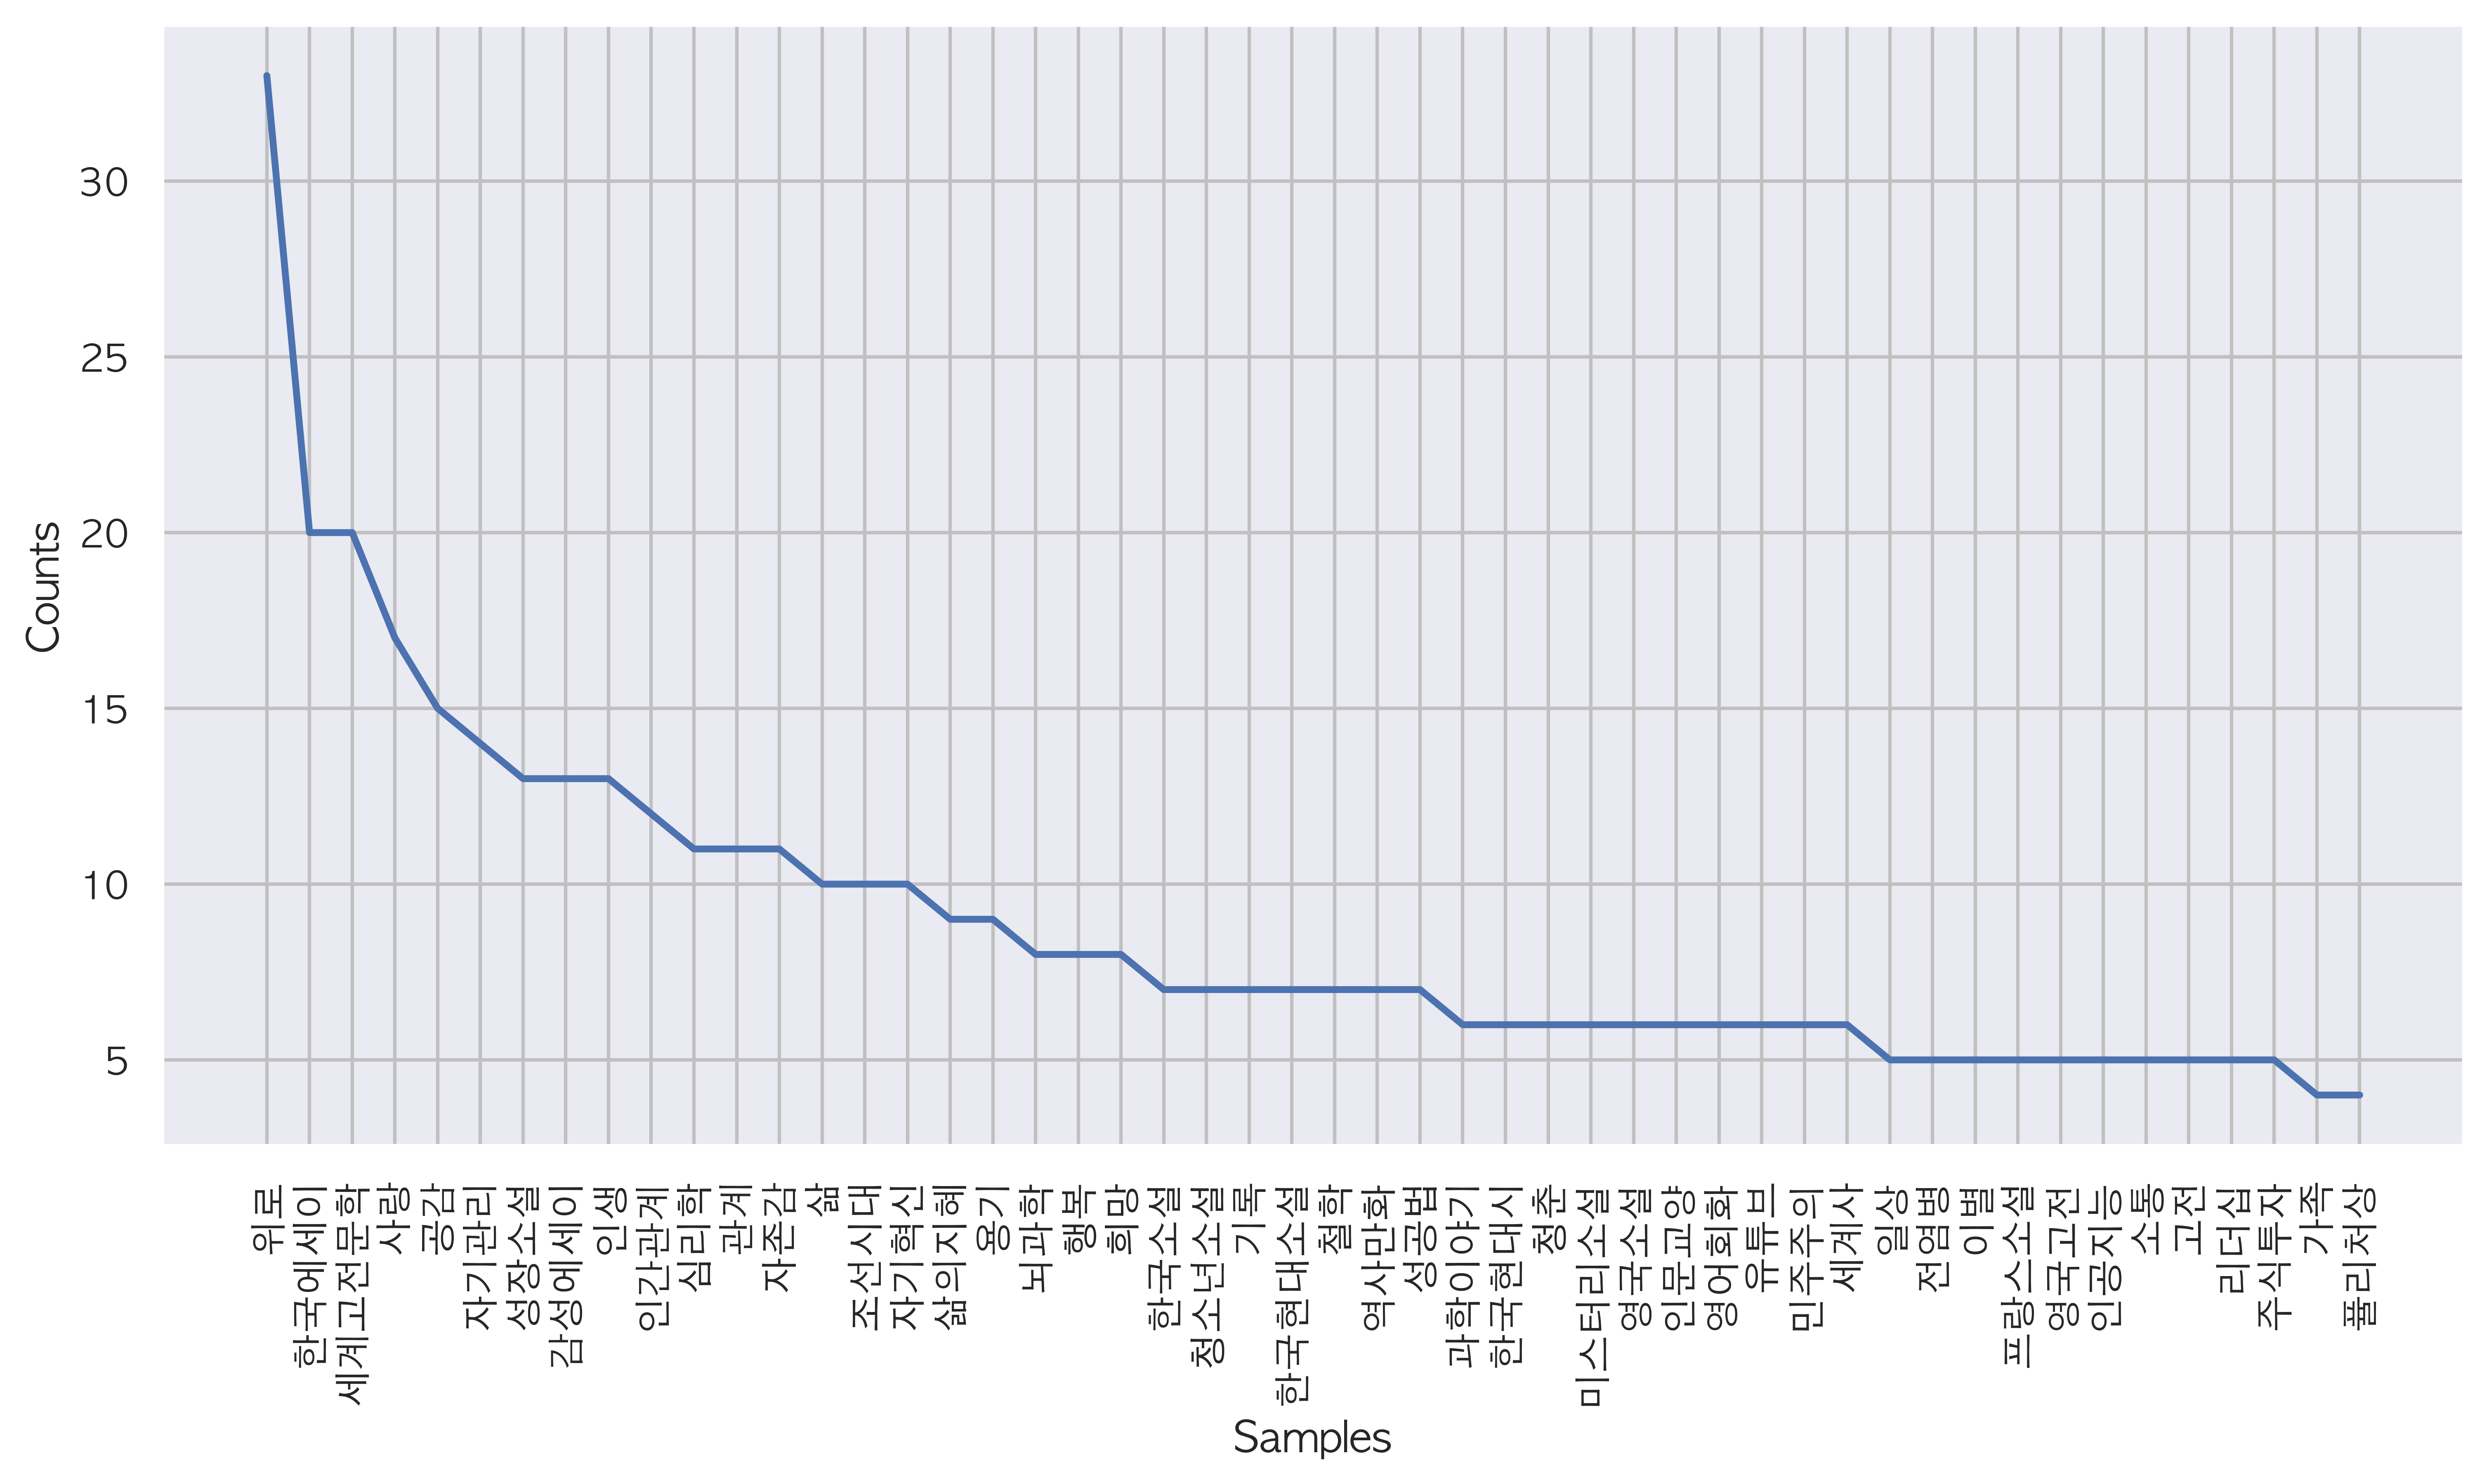

In [95]:
# 단어 빈도 세기
subject_temp3 = nltk.Text(subject_temp, name='키워드')
plt.figure(figsize=(12, 6))
subject_temp3.plot(50)
plt.show()

In [93]:
# 주제와 키워드 합침
com = keyword_temp + subject_temp
com

['시인',
 '수필',
 '오월',
 '박준',
 '박완서',
 '수필집',
 '스토리텔링',
 '광개토대왕',
 '기출문제',
 '파이널',
 '압축',
 '막판',
 '페미니즘',
 '여성학',
 '시선',
 '페미니스트',
 '문화정치',
 '역사학자',
 '인간본성',
 '어머니',
 '작가',
 '한국소설',
 '본성',
 '유진',
 '가족',
 '여성',
 '청소년소설',
 '한국소설',
 '장편소설',
 '여성서사',
 '성장소설',
 '데미안',
 '사문',
 '바라문',
 '뱃사공',
 '타마',
 '미국소설',
 '노벨문학상',
 '퓰리처상',
 '실존철학',
 '마지막소설',
 '미국현대문학',
 '연애',
 '일상',
 '심리학',
 '한국에세이',
 '위로',
 '마음챙김',
 '차라투스트라',
 '철학에세이',
 '우파니샤드',
 '계단',
 '인문과학',
 '불편',
 '여행에세이',
 '바르셀로나',
 '빈티지',
 '포틀랜드',
 '뉴질랜드',
 '베를린',
 '추천코스',
 '여행코스',
 '자전거여행',
 '순환',
 '삼양',
 '동해',
 '여행가이드북',
 '유럽여행',
 '체코',
 '베스트',
 '프라하',
 '크로아티아',
 '여행가이드북',
 '타이베이',
 '타이',
 '대만여행',
 '동부',
 '숙소예약',
 '웹툰',
 '케냐',
 '에티오피아',
 '갱스터',
 '마다가스카르',
 '우간다',
 '책읽기',
 '만화책',
 '스리랑카',
 '영어교육',
 '언어교육',
 '교육방법',
 '시나리오',
 '감독',
 '야구',
 '히어로즈',
 '이글스',
 '이슈',
 '심리치료',
 '응급처치',
 '생존',
 '락스',
 '아쿠아',
 '서바이벌',
 '스티커북',
 '그레이',
 '하운드',
 '아이슬란드',
 '치와와',
 '진돗개',
 '행복',
 '자기관리',
 '자기혁신',
 '대인관계',
 '긍정',
 '우울',
 '유튜브',
 '시간관리',
 '전술',
 '스마트폰',
 '하이라이트',

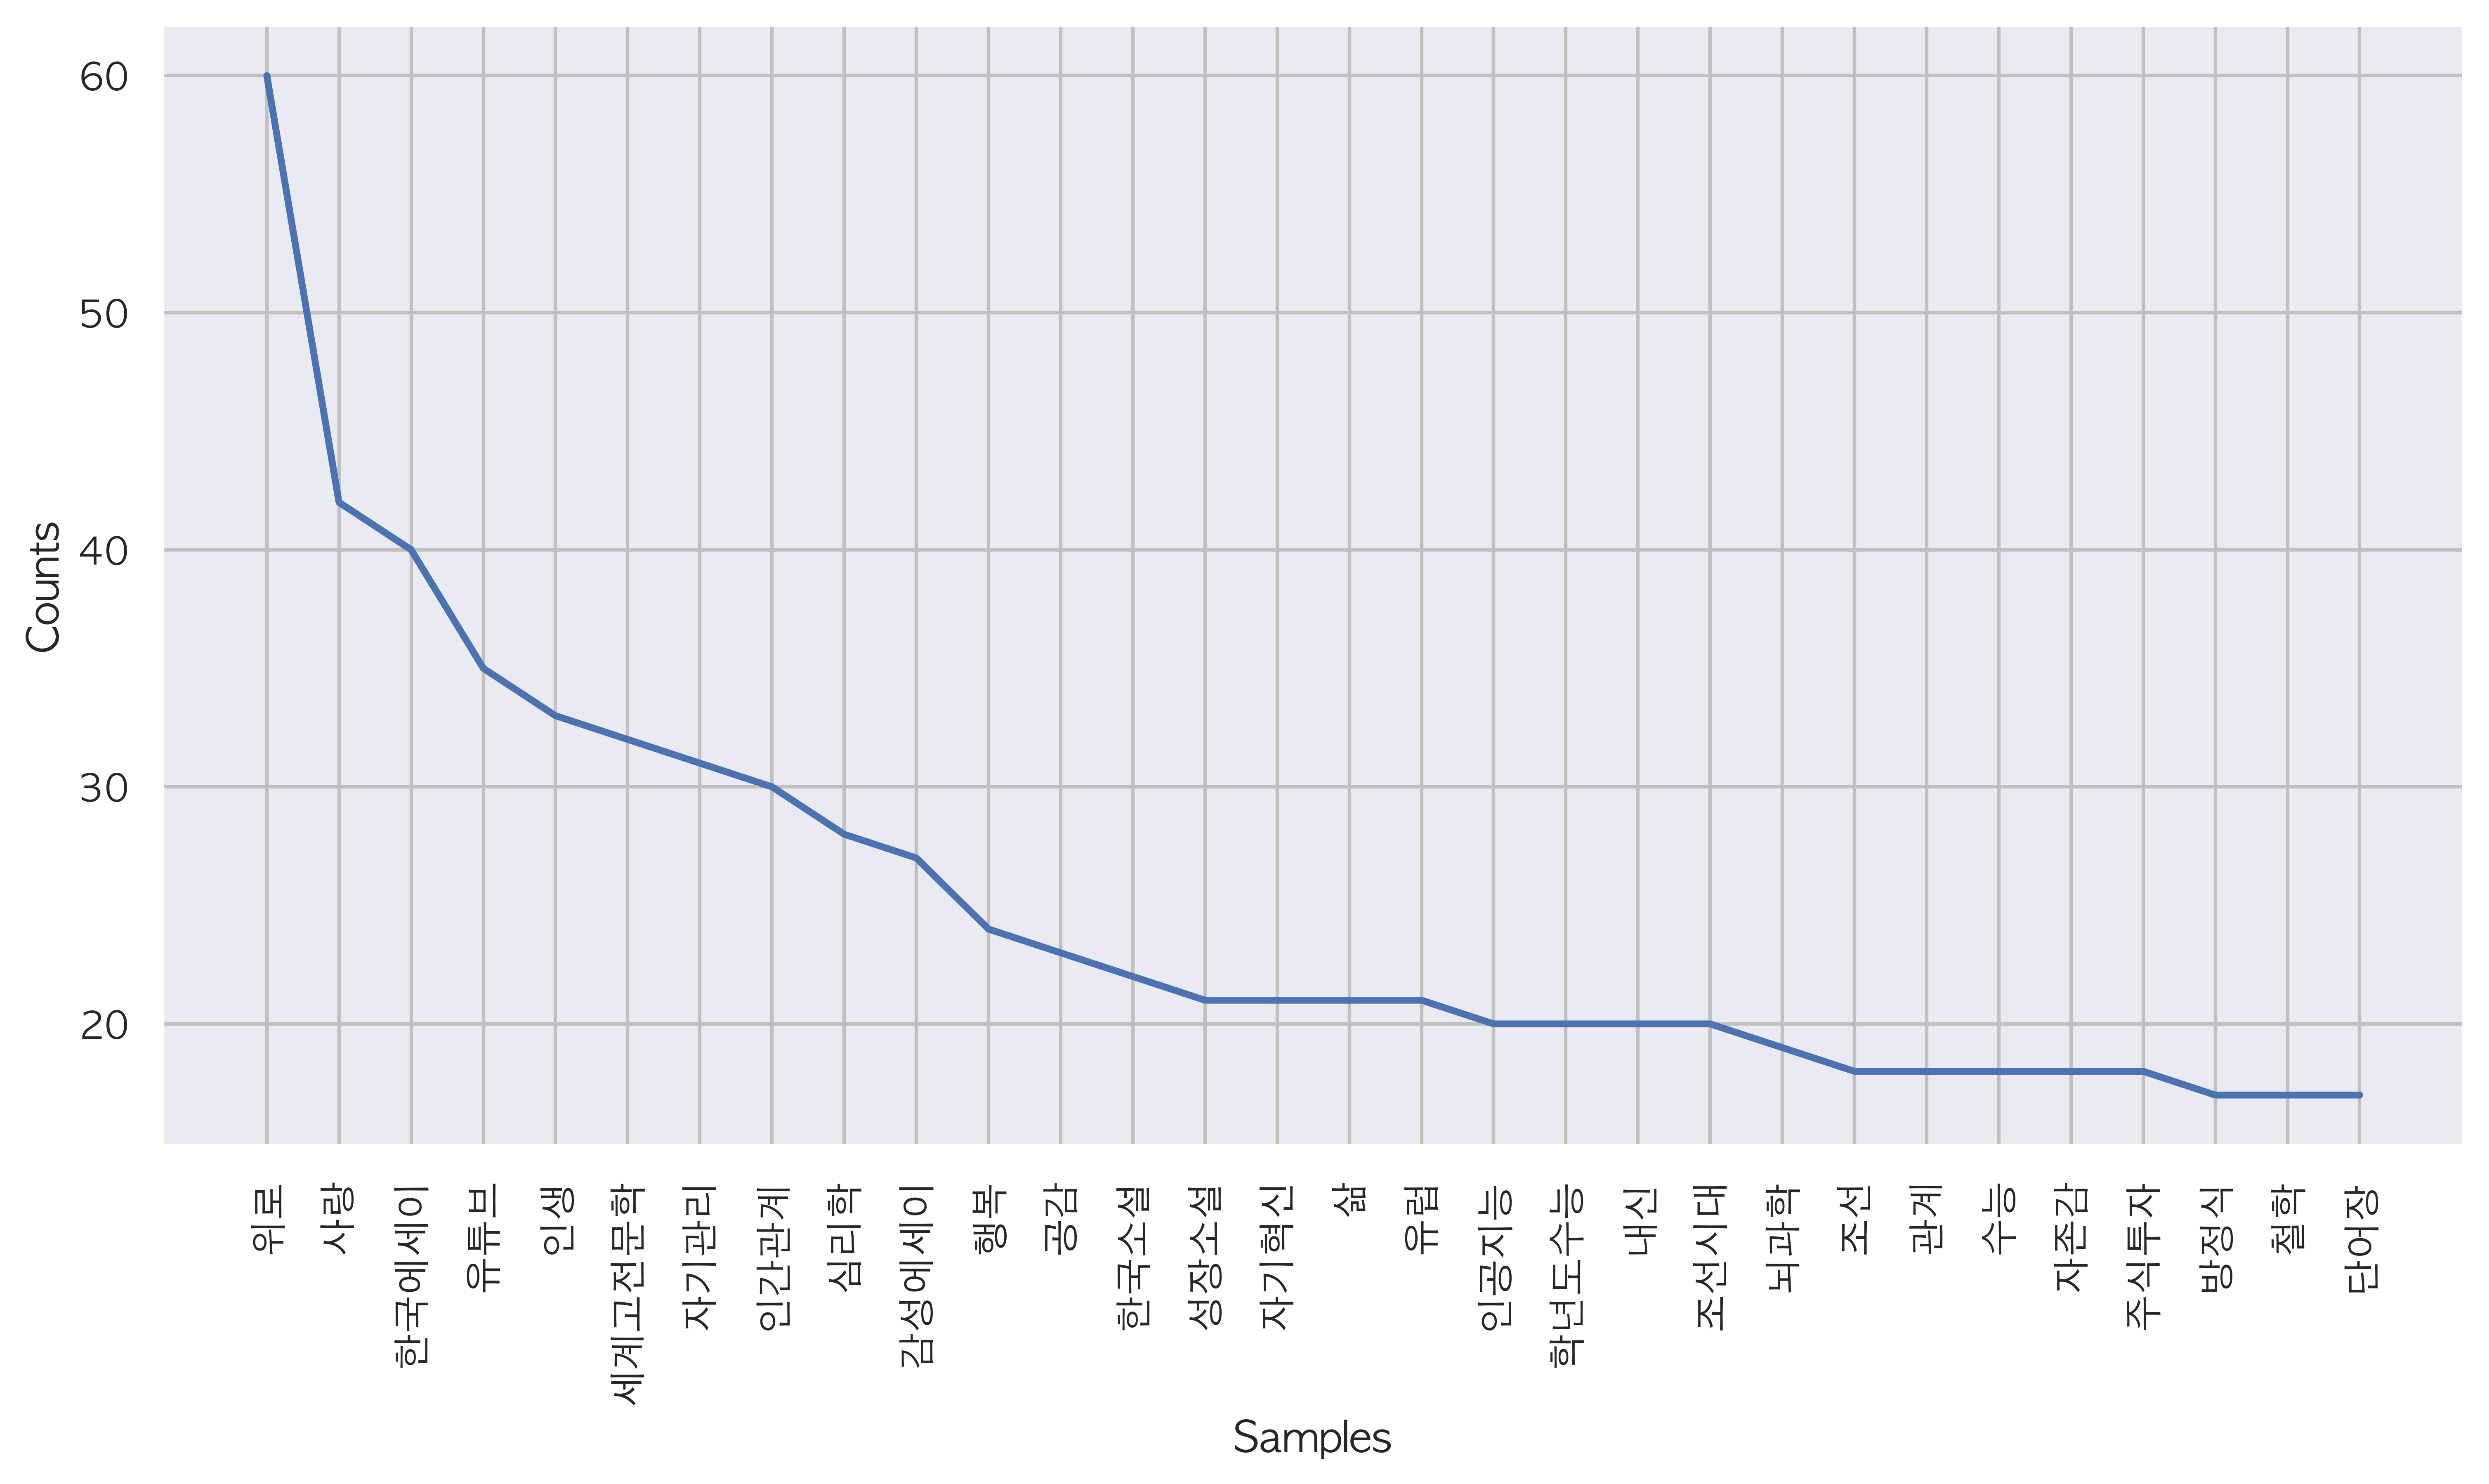

In [97]:
# 단어 빈도 세기
combination = nltk.Text(com, name='키워드')
plt.figure(figsize=(12, 6))
combination.plot(30)
plt.show()

In [99]:
for num in range(0, 1507):
    if '중국' in book_df['keyword'][num] or '중국' in book_df['subject']:
        print(book_df['keyword'][num], book_df['ISBN'][num])

['조동사', '중국', '회화', '체크체크', '주요구문', '개사'] 9788998444273
['중국', '스테디셀러', '한어', '병음', '회화', '복습'] 9788927722427
['여행자', '한국에세이', '상처', '에디션', '소설가', '중국'] 9788954655972
['세계지리', '국제정세', '지정학', '중국', '북극', '서유럽'] 9788993178692
['중국', '메이지유신', '김옥균', '미국일본', '당시조선', '조선사람'] 9791196193423
['문명사', '로마', '고대사', '웹툰', '중국', '돋보기'] 9791162205723
['중국', '세계사', '유럽', '호킹', '이탈리아', '이탈리아어'] 9788934974376
['중국', '러일전쟁', '일본사', '만주', '일본근현대사', '청일전쟁'] 9788974839079
['이집트', '중국', '그리스로마신화', '북유럽신화', '수메르', '인도'] 9791196381578
['교과서', '교양세계사', '유럽', '중국', '소련', '중동'] 9788972917069
['삼국지', '제갈량', '중국', '사마의', '삼국시대', '중국역사인물'] 9791188522316
['조선', '중국', '유럽', '사이공', '태평천국', '한반도'] 9791190630788
['세계사이야기', '유럽', '중국', '아메리카', '마닐라', '다자이'] 9791185093918
['유비', '역사만화', '중국', '드라마', '관우', '중국사'] 9788954671125
['중국', '히틀러', '독일', '로마', '청소년역사', '아메리카'] 9791196558109


In [1]:
df_traveling_type = pd.read_csv('../DATA/activity_labeling.csv')
df_traveling_type.head()

,0,뉴욕,9660,아트어드바이저와 함께 하는 아트 뉴욕-메트로폴리탄 미술관 투어,"20대,혼자 가는 여행으로 구매가 많은 상품",#세계 #미술 #역사 #지식 #이해 #큐레이터 #아트어드바이저 #설명 #질의응답 #하이라이트 #비하인드 #3시간 #자녀 #혼자,문화예술,0.1
0,1,뉴욕,5665,"뉴욕 미술가 와 함께하는 미술다큐 1 "" 뉴욕의 미술관 "" 모마 또는 휘트니 뮤지엄","20대,혼자 가는 여행으로 구매가 많은 상품",#현대미술 #스토리 #미술 #역사 #전문가 #예술 #감성 #호퍼 #휘트니 #반고흐 ...,문화예술,0
1,2,뉴욕,2097,뉴욕 야경 투어,"30대,혼자 가는 여행으로 구매가 많은 상품",#야경 #색감 #센스 #위치선정 #자동차 #드립 #배경음악 #음악 #유쾌 #시각 #...,도시,0
2,3,뉴욕,5833,덤보+야경투어 뉴요커처럼 즐기기,"30대,혼자 가는 여행으로 구매가 많은 상품",#로컬 #라이브 #펍 #피자 #라운지바 #재즈바 #뉴요커 #도보 #술 #클럽 #스냅...,도시,0
3,4,뉴욕,6282,"뉴욕 미술가와 함께하는 미술다큐 2 "" 뉴욕의 미술관 "" ( Met ) 메트로폴리탄 투어","30대,혼자 가는 여행으로 구매가 많은 상품",#미술 #역사 #실내 #행복 #신념 #사랑,문화예술,0
4,5,뉴욕,10504,맨하탄 미드타운 다운타운 차량 투어(자유의 여신상 페리 포함),"40대,자녀와 가는 여행으로 구매가 많은 상품",#맛집 #자유의여신상 #페리 #자동차 #미드타운 #다운타운 #유명관광지 #간식 #커...,맛집,0


In [2]:
df_traveling_type.columns

Index(['0', '뉴욕', '9660', '아트어드바이저와 함께 하는 아트 뉴욕-메트로폴리탄 미술관 투어',
       '20대,혼자 가는 여행으로 구매가 많은 상품',
       '#세계 #미술 #역사 #지식 #이해 #큐레이터 #아트어드바이저 #설명 #질의응답 #하이라이트 #비하인드 #3시간 #자녀 #혼자',
       '문화예술', '0.1'],
      dtype='object')